In [1]:
import numpy as np
import os
from IPython.display import HTML
from PIL import Image
import matplotlib.pyplot as plt

with open("/kaggle/input/assets-v2/custom.css", "r") as file:
    custom_css = file.read()    
HTML(f"<style>{custom_css}</style>")  

# Definitions

## The Singular Value Decomposition
![](https://cdn.discordapp.com/attachments/1138429642211086346/1160361541472882758/image_2023-10-08_014123830-removebg-preview.png)

<span style="font-family: 'Young Serif', serif; font-size:20px"> Our Image Data matrix X decomposes into U, $\Sigma$, V<sup>T</sup> </span>
 
<span style="font-family: 'Comfortaa', serif; font-size:20px">   
    X:  $\in$ R<sup>m x n</sup>  <br> 
    U $\in$ R<sup>m x r</sup> <br>
    $\Sigma$  $\in$ R <sup>r x r</sup> <br>
    V<sup>T</sup>  $\in$ R <sup> r x n</sup> <br>
</span>  
    
<span style="font-family: 'Young Serif', serif; font-size:20px"> U and V<sup>T</sup>square unitary matrices now reduced like so</span> <br>
<span style="font-family: 'Comfortaa', serif; font-size:20px">     
 =  σ<sub>1</sub>u<sub>1</sub>v<sub>1</sub><sup>T</sup> + σ<sub>2</sub>u<sub>2</sub>v<sub>2</sub><sup>T</sup> + ... + σ<sub>m</sub>u<sub>m</sub>v<sub>m</sub><sup>T</sup> + O <br>
    = Û$\hat{Σ} \hat{V}$<sup>T</sup>
  </span> 'reduced svd' 
    
 

# Code

In [2]:
images_path = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        images_path.append(os.path.join(dirname, filename))

# select img to be processed
selected_img = images_path[2]
original_img = Image.open(selected_img).convert("L")


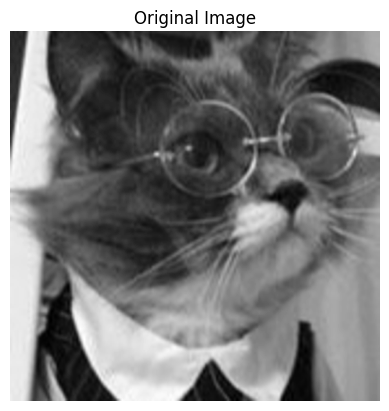

In [3]:
size=512
og_img = np.array(original_img.resize((size, size)))     

plt.imshow(og_img, cmap='gray')
plt.title(f"Original Image")
plt.axis('off')
plt.show()

In [4]:
# SVD 
U, S, V = np.linalg.svd(og_img, full_matrices=False)

In [5]:
# sorting *not needed
indices = np.argsort(S)[::-1]  # Get indices that sort S in descending order
S_n = S[indices]
U_n = U[:, indices]
V_n = V[indices, :]

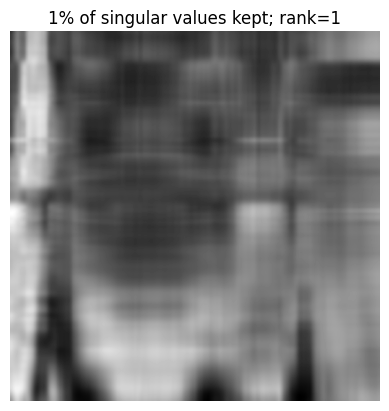

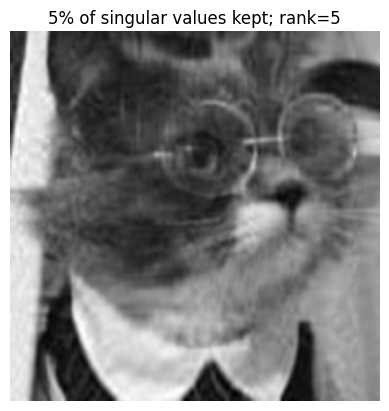

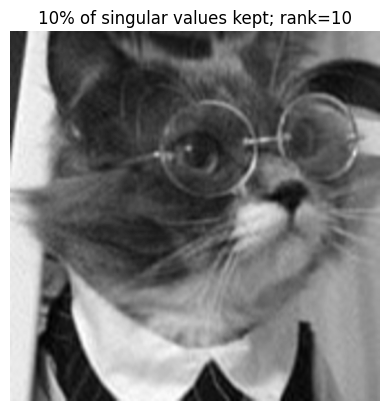

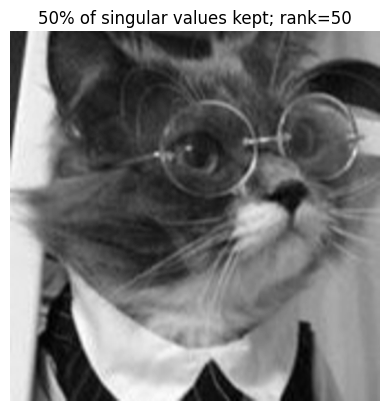

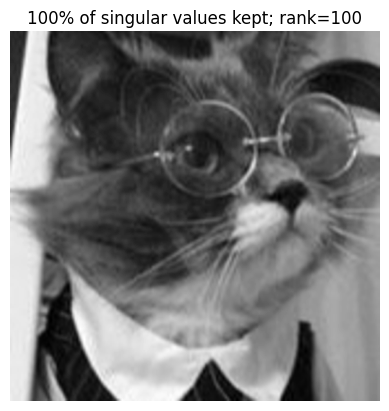

In [6]:
i=0
for _ in [1,5,10,50,100]:
    S_temp = np.array(S, copy=True) 
    singular_remain = int(len(S) * (_/ 100))
    S_temp[singular_remain:] = 0
   
    plt.figure(i+1)
    i+=1
    test_matrix = U_n*S_temp@V_n
    
    plt.imshow(test_matrix, cmap='gray')
    plt.title(f"{_}% of singular values kept; rank={_}")
    plt.axis('off') 

# Singular Values Plot

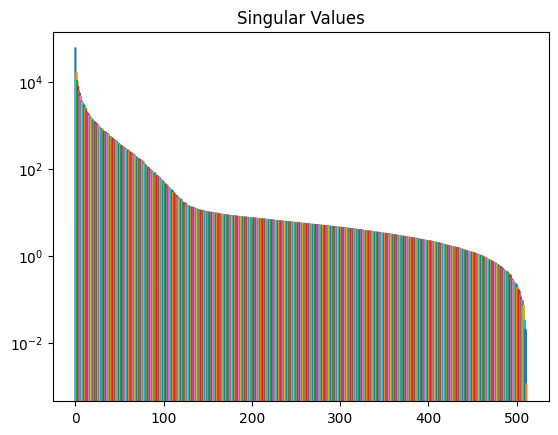

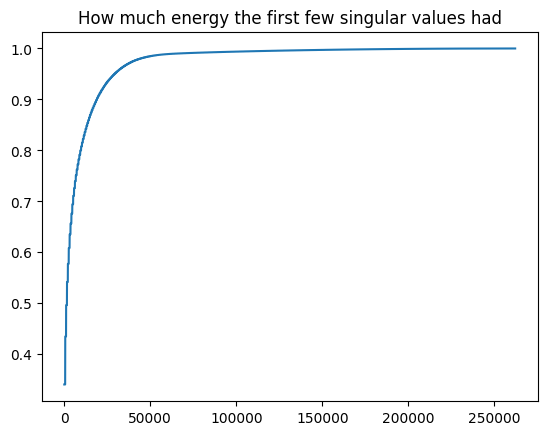

In [7]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title("Singular Values")
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title("How much energy the first few singular values had")
plt.show()